# 인공지능 개론   
## 1주차 실습 과제
<첨부한 파일을 자신의 컴퓨터 저장받고,
저장경로를 확인한 후에<span style="color:blue"> DT, RF, SVM, LR</span> 분류를 각각 수행하시오.>




In [60]:
# 라이브러리 로드
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [61]:
# 데이터 로드
file_path = "C:/AI_File/iris.csv"  # 파일 경로
df = pd.read_csv(file_path)

print("iris.csv 데이터 확인")
# 데이터프레임을 표로 출력
display(df)  
print("\n🔹 데이터 정보:")
print(df.info())


print("\n🔹 결측값 확인:")
print(df.isnull().sum())
print("\n🔹 결측값 제거 후 확인:")
df = df.dropna()
print(df.isnull().sum())



iris.csv 데이터 확인


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



🔹 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

🔹 결측값 확인:
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

🔹 결측값 제거 후 확인:
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64


In [62]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')


🔹 클래스 분포:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64


Text(0.5, 1.0, 'Label')

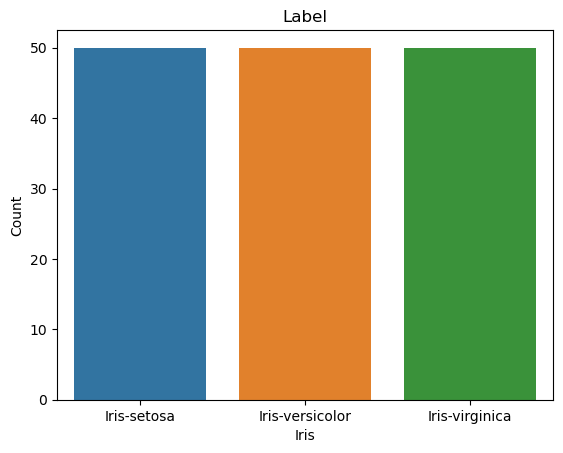

In [63]:
print("\n🔹 클래스 분포:")
y=df['Name']
print(y.value_counts())
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Name")
plt.xlabel("Iris")
plt.ylabel("Count")
plt.title("Label")

In [64]:
Y = pd.get_dummies(y).values
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

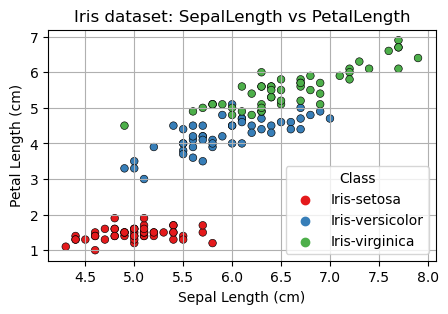

In [65]:
#데이터 시각화

plt.figure(figsize=(5, 3)) 
class_labels = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}
sns.scatterplot(
    x=df_plot["SepalLength"],
    y=df_plot["PetalLength"],
    hue=df_plot["Label"].map(class_labels),
    palette="Set1",
    s=30,  # 점 크기 조정
    marker="o",  # 'x' 대신 'o' 사용해서 경고 해결
    edgecolor="black"
)

plt.title("Iris dataset: SepalLength vs PetalLength")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Class")
plt.grid(True)
plt.show()

warnings.filterwarnings("ignore")


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 특성과 타겟 분리
X_iris = df.drop(columns=["Name"])  # 특성(Feature) 데이터
y_iris = df["Name"]  # 타겟(Label) 데이터

# 라벨 인코딩 (문자열 → 숫자 변환)
label_encoder = LabelEncoder()
y_iris = label_encoder.fit_transform(y_iris)

# 학습(Train) / 테스트(Test) 데이터 분할 
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.25, random_state=0
)

# 데이터셋 형태 확인
data_shapes = {
    "X_train Shape": X_train_iris.shape,
    "X_test Shape": X_test_iris.shape,
    "y_train Shape": y_train_iris.shape,
    "y_test Shape": y_test_iris.shape,
}

data_shapes


{'X_train Shape': (112, 4),
 'X_test Shape': (38, 4),
 'y_train Shape': (112,),
 'y_test Shape': (38,)}

In [72]:
X_train_iris

,SepalLength,SepalWidth,PetalLength,PetalWidth
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [73]:
 y_train_iris

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

In [74]:
#DT분류
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
# 의사결정트리 모델 학습
dt_model_iris = DecisionTreeClassifier(random_state=42)
dt_model_iris.fit(X_train_iris, y_train_iris)

# 예측 수행
y_pred_iris = dt_model_iris.predict(X_test_iris)

# 성능 평가
dt_accuracy = accuracy_score(y_test_iris, y_pred_iris)
dt_classification_report = classification_report(y_test_iris, y_pred_iris)

# 의사결정트리(Decision Tree) 결과 출력
print("🔹 [Decision Tree Classification Report] 🔹")
print(classification_report(y_test_iris, y_pred_iris))

# 정확도 출력
print(f"🔹 DT Accuracy: {dt_accuracy:.4f}")
print(confusion_matrix(y_test, y_pred_iris))

🔹 [Decision Tree Classification Report] 🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

🔹 DT Accuracy: 0.9737
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [75]:
#RF 분류
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 학습
rf_model_iris = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_iris.fit(X_train_iris, y_train_iris)

# 예측 수행
y_pred_rf = rf_model_iris.predict(X_test_iris)

# 성능 평가
rf_accuracy = accuracy_score(y_test_iris, y_pred_rf)
rf_classification_report = classification_report(y_test_iris, y_pred_rf)

print("🔹 [Random Forest Classification Report] 🔹")
print(rf_classification_report)

print(f"🔹 RF Accuracy: {rf_accuracy:.5f}")
print(confusion_matrix(y_test,y_pred_rf))


🔹 [Random Forest Classification Report] 🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

🔹 RF Accuracy: 0.97368
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [76]:
#SVM 분류
from sklearn.svm import SVC

# SVM 모델 학습
svm_model_iris = SVC(kernel="linear", random_state=42)
svm_model_iris.fit(X_train_iris, y_train_iris)

# 예측 수행
y_pred_svm = svm_model_iris.predict(X_test_iris)

# 성능 평가
svm_accuracy = accuracy_score(y_test_iris, y_pred_svm)
svm_classification_report = classification_report(y_test_iris, y_pred_svm)

# 결과 출력
print("🔹 [SVM Classification Report] 🔹")
print(svm_classification_report)

print(f"🔹 SVM Accuracy: {svm_accuracy:.5f}")
print(confusion_matrix(y_test,y_pred_svm))

🔹 [SVM Classification Report] 🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

🔹 SVM Accuracy: 0.97368
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [77]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 학습
lr_model_iris = LogisticRegression(max_iter=200, random_state=42)
lr_model_iris.fit(X_train_iris, y_train_iris)

# 예측 수행
y_pred_lr = lr_model_iris.predict(X_test_iris)

# 성능 평가
lr_accuracy = accuracy_score(y_test_iris, y_pred_lr)
lr_classification_report = classification_report(y_test_iris, y_pred_lr)

# 결과 출력
print("🔹 [Logistic Regression Classification Report] 🔹")
print(lr_classification_report)

print(f"🔹 Logistic Regression Accuracy: {lr_accuracy:.5f}")
print(confusion_matrix(y_test, y_pred_lr))

🔹 [Logistic Regression Classification Report] 🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

🔹 Logistic Regression Accuracy: 0.97368
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
